# <font color=brown> Linear Regression Assignment </font>

## Problem Statement

A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.


A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 


In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.


They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

* Which variables are significant in predicting the demand for shared bikes.
* How well those variables describe the bike demands

Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors. 



## Business Goal

We need to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 

## Data Observation & Preparation

#### Import the Required Packages

In [113]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [220]:
import sklearn 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score

#### Reading the Data & Observing the column details

In [115]:
Day = pd.read_csv("day.csv")
Day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [116]:
Day.tail()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
725,726,27-12-2019,1,1,12,0,5,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114
726,727,28-12-2019,1,1,12,0,6,0,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095
727,728,29-12-2019,1,1,12,0,0,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341
728,729,30-12-2019,1,1,12,0,1,1,1,10.489153,11.58500,48.3333,23.500518,364,1432,1796
729,730,31-12-2019,1,1,12,0,2,1,2,8.849153,11.17435,57.7500,10.374682,439,2290,2729


In [117]:
Day.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [118]:
Day.describe(include = 'all')

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
unique,NaN,730,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,01-01-2018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,365.500000,NaN,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,NaN,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,NaN,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,NaN,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,NaN,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000


In [119]:
Day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [120]:
Day.isnull().sum().sort_values(ascending = False)

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [121]:
Day.drop_duplicates(subset=None, inplace=True)

In [122]:
Day.season.value_counts()

3    188
2    184
1    180
4    178
Name: season, dtype: int64

In [123]:
Day.yr.value_counts()

0    365
1    365
Name: yr, dtype: int64

In [124]:
Day.mnth.value_counts()

1     62
3     62
5     62
7     62
8     62
10    62
12    62
4     60
6     60
9     60
11    60
2     56
Name: mnth, dtype: int64

In [125]:
Day.holiday.value_counts()

0    709
1     21
Name: holiday, dtype: int64

In [126]:
Day.weekday.value_counts()

1    105
2    105
3    104
4    104
5    104
6    104
0    104
Name: weekday, dtype: int64

In [127]:
Day.weekday.value_counts()

1    105
2    105
3    104
4    104
5    104
6    104
0    104
Name: weekday, dtype: int64

In [128]:
Day.workingday.value_counts()

1    504
0    226
Name: workingday, dtype: int64

In [129]:
Day.temp.value_counts()

26.035000    5
10.899153    5
27.880000    4
28.563347    4
23.130847    4
            ..
27.435847    1
26.376653    1
28.989419    1
28.700000    1
8.849153     1
Name: temp, Length: 498, dtype: int64

In [130]:
Day.atemp.value_counts()

32.73440    4
18.78105    3
31.85040    3
28.59875    2
23.32625    2
           ..
28.94730    1
30.46145    1
30.10650    1
31.34500    1
11.17435    1
Name: atemp, Length: 689, dtype: int64

In [131]:
Day.hum.value_counts()

61.3333    4
63.0833    3
55.2083    3
60.5000    3
56.8333    3
          ..
54.8333    1
56.1765    1
85.0000    1
76.1250    1
57.7500    1
Name: hum, Length: 594, dtype: int64

In [132]:
 Day.windspeed.value_counts()

9.041918     3
11.166689    3
11.250104    3
15.333486    3
7.959064     3
            ..
12.416775    1
13.833289    1
14.250632    1
23.044181    1
10.374682    1
Name: windspeed, Length: 649, dtype: int64

In [133]:
 Day.casual.value_counts()

120     4
968     4
639     3
163     3
775     3
       ..
2521    1
1935    1
783     1
688     1
364     1
Name: casual, Length: 605, dtype: int64

In [134]:
 Day.registered.value_counts()

4841    3
6248    3
1707    3
3461    2
2713    2
       ..
4138    1
3231    1
4018    1
3077    1
2290    1
Name: registered, Length: 678, dtype: int64

In [135]:
Day.shape

(730, 16)

Here, we can see that total 730 rows & 16 columns are available in the dataset from 2018 Jan 1 to Dec.31, 2019. The factors related to the booking count has been listed in different columns. The min and max values, avg values, no. of unique values, no. of null values and the data type of each column can be identified above. Now, the data set is ready for further analysis.

#### Data visualization to foresee the Correlation

As indicated in the problem statement 'cnt' is the target variable (the values to be predicted / analyzed). We need to see the relationship between the Target variable and all other variables by plotting graphs. 

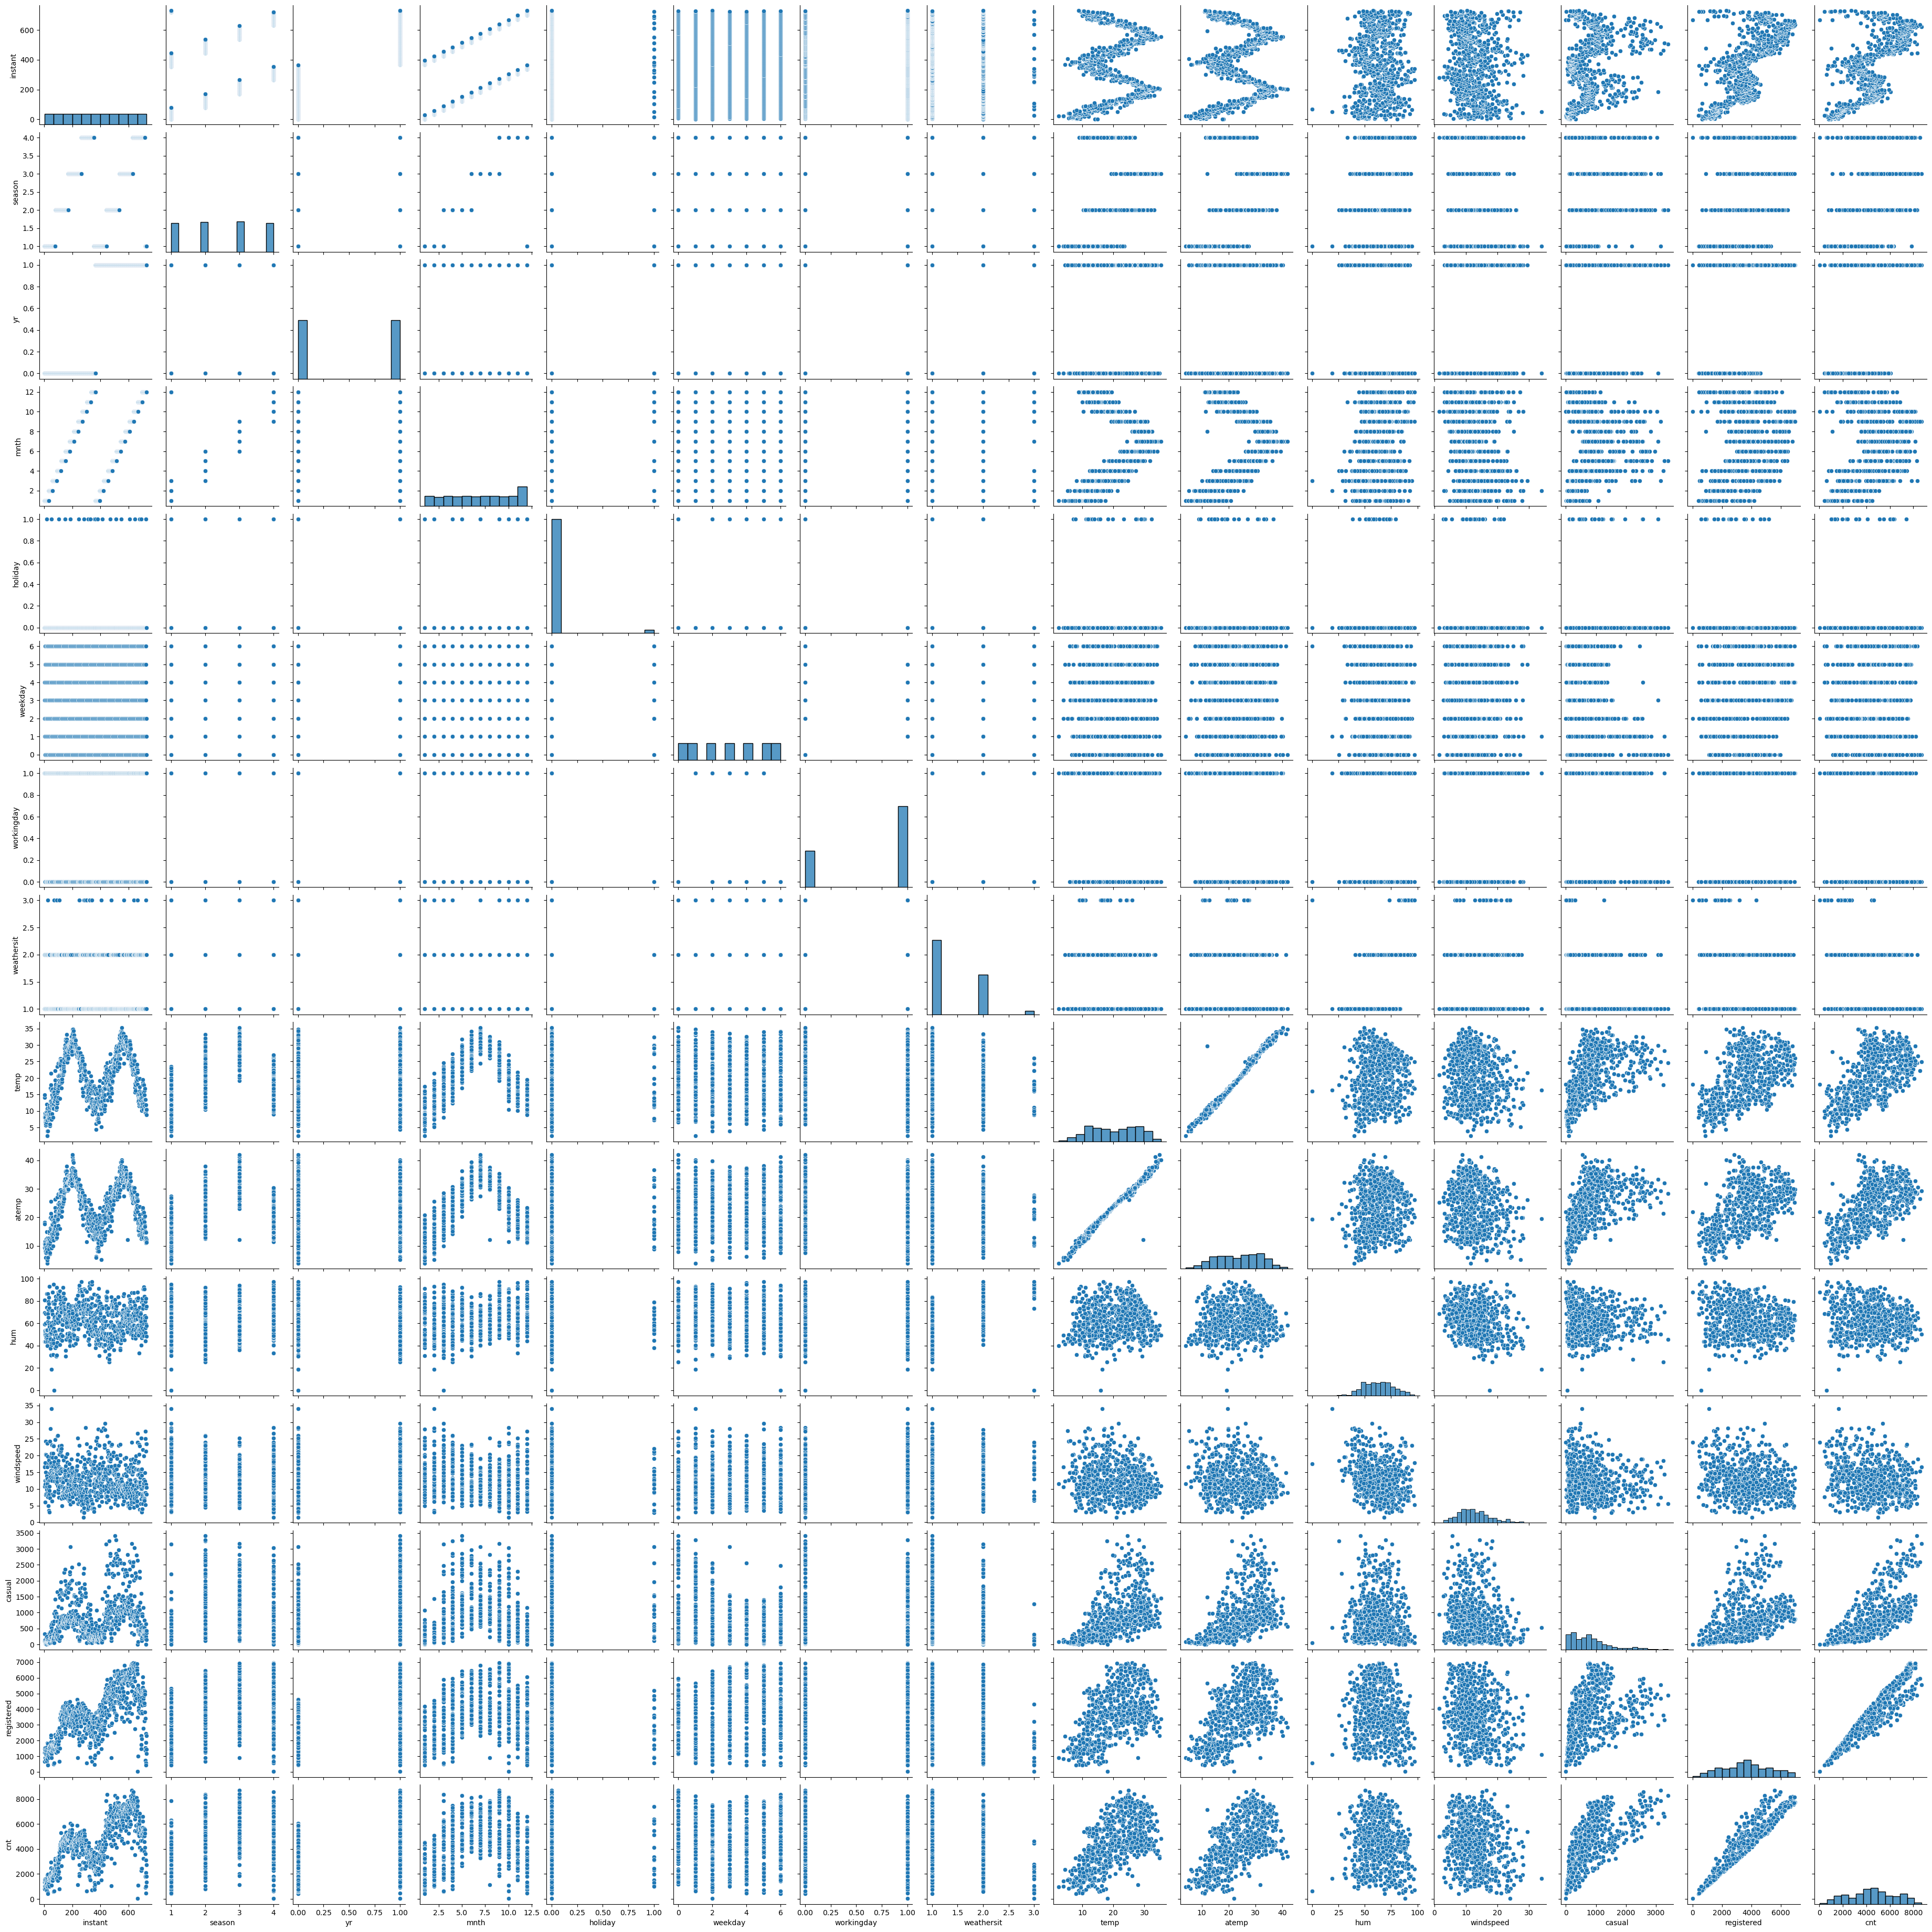

In [6]:
sns.pairplot(Day)
plt.show()

By observing the above patterns, we can see the correlation between the variables. For example, cnt vs instant, cnt vs yr, cnt vs temp, cnt vs atemp, cnt vs casual & registered. 


The column 'instant' just follows the serial number of the data. The column 'dteday' has already splitted as year, month, weekday, holiday and working day. The total count has been splitted as casual / registered type. 'cnt' is the sum of casual & registered bookings. Hence, these 4 columns can be deleted. 

In [136]:
Day.drop('instant', axis = 1, inplace = True)

In [137]:
Day.drop('dteday', axis = 1, inplace = True)

In [138]:
Day.drop('casual', axis = 1, inplace = True)

In [139]:
Day.drop('registered', axis = 1, inplace = True)

In [140]:
Day.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [141]:
Day.shape

(730, 12)

Also, we can see that some of the columns (season, weekday, weathersit) have just indicated as numbers. We need to convert it into categorical actual values based on the data dictionary given.

In [142]:
Day.season.replace({1:"spring",2:"summer",3:"fall",4:"winter"},inplace=True)

In [143]:
Day.weathersit.replace({1: 'Clear, Few clouds', 
                        2: 'Mist + Cloudy', 
                        3: 'Light Snow, Rain + Thunderstorm',
                        4: 'Heavy Rain + Ice Pallets'},inplace=True)

In [144]:
Day.weekday.replace({0:"Sunday",1:"Monday",2:"Tuesday",3:"Wednesday",4:"Thursday",5:"Friday",6:"Saturday"},inplace=True)

In [145]:
Day.mnth.replace({1: 'January', 
                        2: 'February', 
                        3: 'March',
                        4: 'April',
                         5: 'May',
                         6: 'June',
                         7: 'July',
                         8: 'August',
                         9: 'September',
                         10: 'October',
                         11: 'November',
                         12: 'December'},inplace=True)

In [146]:
Day.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,January,0,Monday,1,Mist + Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,January,0,Tuesday,1,Mist + Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,January,0,Wednesday,1,"Clear, Few clouds",8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,January,0,Thursday,1,"Clear, Few clouds",8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,January,0,Friday,1,"Clear, Few clouds",9.305237,11.46350,43.6957,12.522300,1600


In [147]:
Day.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 74.1+ KB


<AxesSubplot:xlabel='season', ylabel='cnt'>

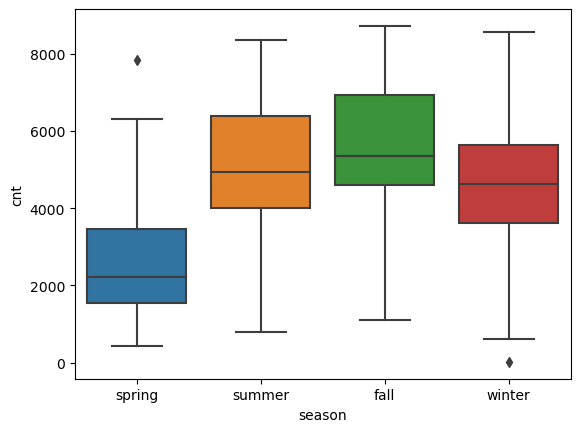

In [148]:
sns.boxplot(y='cnt', x='season', data = Day)

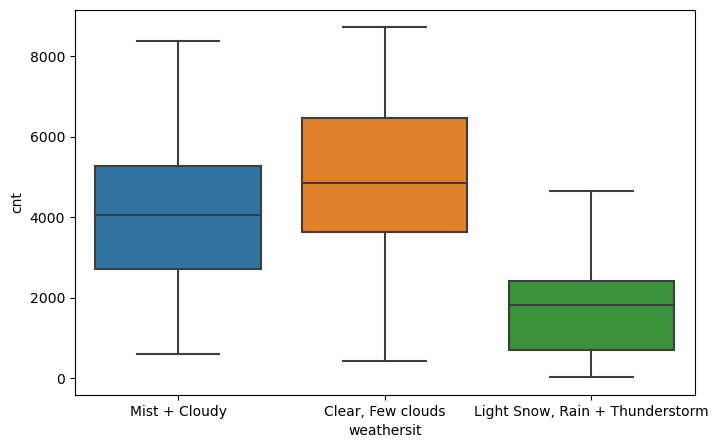

In [149]:
plt.figure(figsize = (8,5))
sns.boxplot(y='cnt', x='weathersit', data = Day)
plt.show()

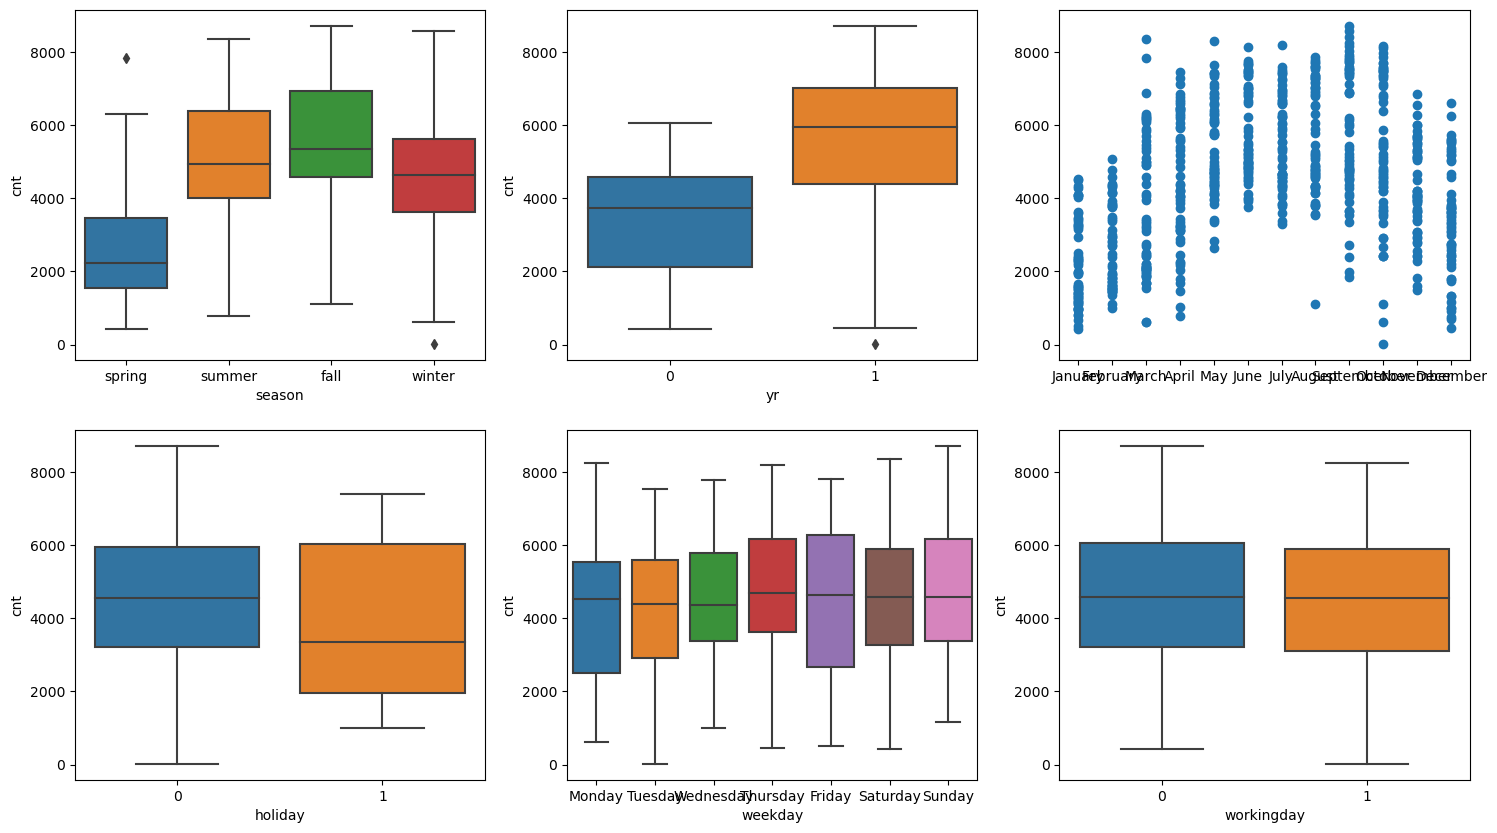

In [150]:
plt.figure(figsize = (18,10))
plt.subplot(2,3,1)
sns.boxplot(y='cnt', x='season', data = Day)
plt.subplot(2,3,2)
sns.boxplot(y='cnt', x='yr', data = Day)
plt.subplot(2,3,3)
plt.scatter(y='cnt', x='mnth', data = Day)
plt.subplot(2,3,4)
sns.boxplot(y='cnt', x='holiday', data = Day)
plt.subplot(2,3,5)
sns.boxplot(y='cnt', x='weekday', data = Day)
plt.subplot(2,3,6)
sns.boxplot(y='cnt', x='workingday', data = Day)
plt.show()

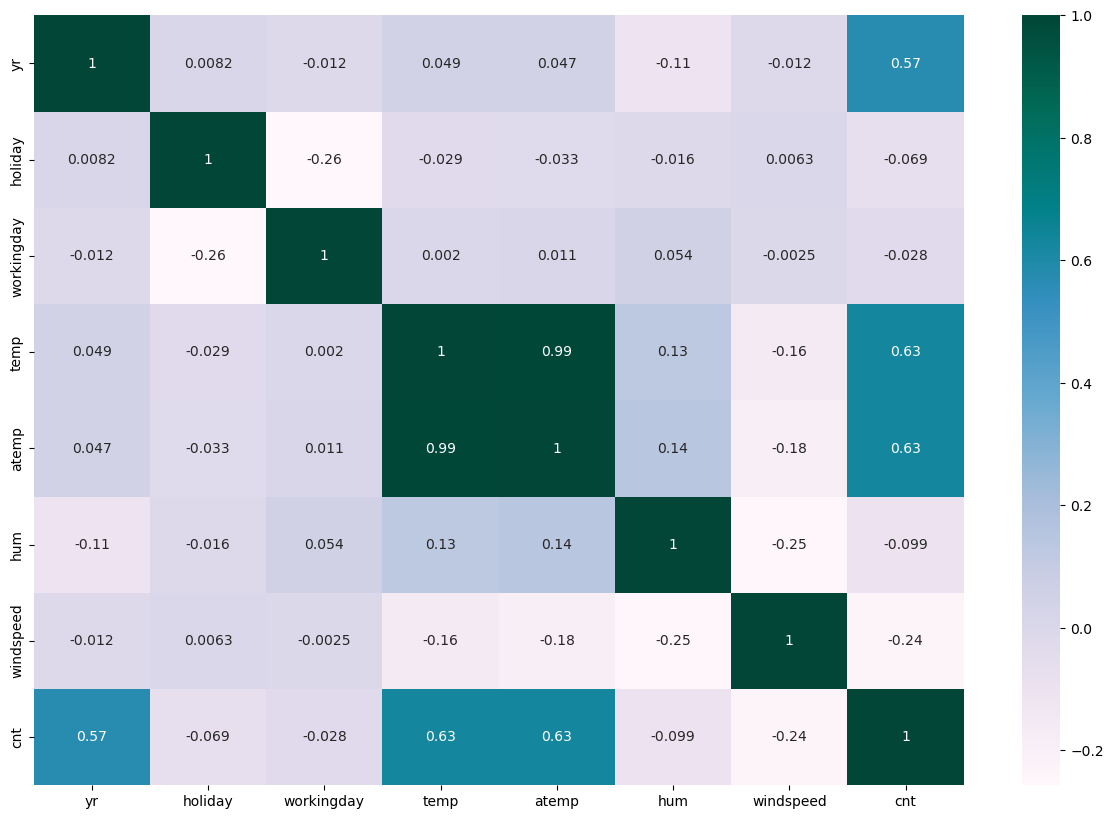

In [151]:
plt.figure(figsize = (15, 10))
sns.heatmap(Day.corr(), annot = True, cmap="PuBuGn")
plt.show()

<Figure size 1000x600 with 0 Axes>

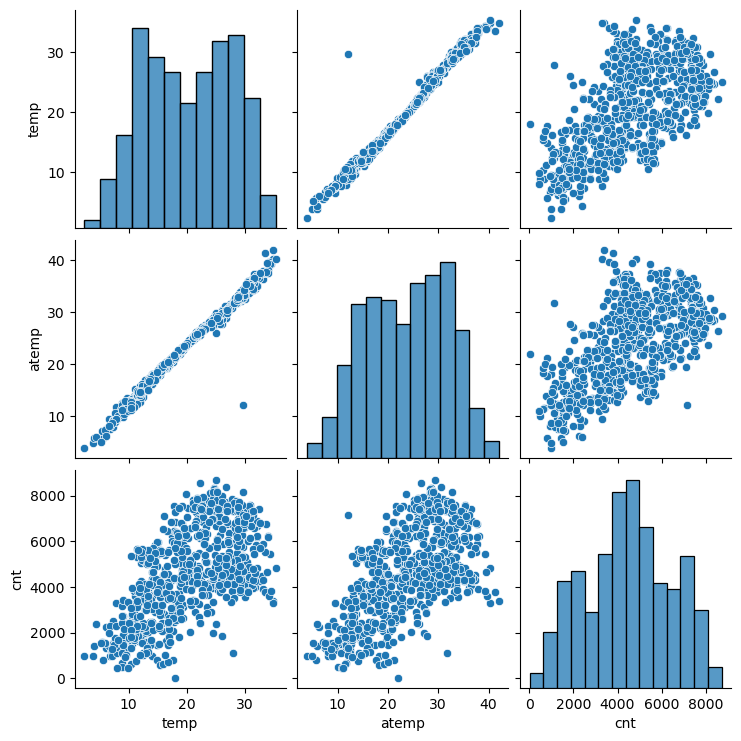

In [152]:
plt.figure(figsize=(10,6))
sns.pairplot(Day[['temp', 'atemp','cnt']])
plt.show()

From the above plots, we will get a basic analysis on the relationship of each columns with count. 

temp & atemp columns have same correlation with cnt. / temp & atemp are correlated each other. HGence, we can drop this column. 

In [153]:
Day.drop('atemp', axis = 1, inplace = True)

In [154]:
Day.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,spring,0,January,0,Monday,1,Mist + Cloudy,14.110847,80.5833,10.749882,985
1,spring,0,January,0,Tuesday,1,Mist + Cloudy,14.902598,69.6087,16.652113,801
2,spring,0,January,0,Wednesday,1,"Clear, Few clouds",8.050924,43.7273,16.636703,1349
3,spring,0,January,0,Thursday,1,"Clear, Few clouds",8.200000,59.0435,10.739832,1562
4,spring,0,January,0,Friday,1,"Clear, Few clouds",9.305237,43.6957,12.522300,1600


In [155]:
Day.shape

(730, 11)

### Linear Regression & Model Building

First of all, we need to convert all categorical values to dummy variables. Then we have to concatenate these columns to the original dataset. And, drop the 

In [156]:
season_dum = pd.get_dummies(Day.season, drop_first=True)

In [157]:
mnth_dum = pd.get_dummies(Day.mnth, drop_first=True)

In [158]:
weekday_dum = pd.get_dummies(Day.weekday, drop_first=True)

In [159]:
weathersit_dum = pd.get_dummies(Day.weathersit, drop_first=True)

In [160]:
Day = pd.concat([Day,season_dum], axis = 1)
Day = pd.concat([Day,mnth_dum], axis = 1)
Day = pd.concat([Day,weekday_dum], axis = 1)
Day = pd.concat([Day,weathersit_dum], axis = 1)

In [161]:
Day.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,...,October,September,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,"Light Snow, Rain + Thunderstorm",Mist + Cloudy
0,spring,0,January,0,Monday,1,Mist + Cloudy,14.110847,80.5833,10.749882,...,0,0,1,0,0,0,0,0,0,1
1,spring,0,January,0,Tuesday,1,Mist + Cloudy,14.902598,69.6087,16.652113,...,0,0,0,0,0,0,1,0,0,1
2,spring,0,January,0,Wednesday,1,"Clear, Few clouds",8.050924,43.7273,16.636703,...,0,0,0,0,0,0,0,1,0,0
3,spring,0,January,0,Thursday,1,"Clear, Few clouds",8.200000,59.0435,10.739832,...,0,0,0,0,0,1,0,0,0,0
4,spring,0,January,0,Friday,1,"Clear, Few clouds",9.305237,43.6957,12.522300,...,0,0,0,0,0,0,0,0,0,0


In [162]:
Day.drop('season', axis = 1, inplace = True)

In [163]:
Day.drop('mnth', axis = 1, inplace = True)

In [164]:
Day.drop('weekday', axis = 1, inplace = True)

In [165]:
Day.drop('weathersit', axis = 1, inplace = True)

In [166]:
Day.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,...,October,September,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,"Light Snow, Rain + Thunderstorm",Mist + Cloudy
0,0,0,1,14.110847,80.5833,10.749882,985,1,0,0,...,0,0,1,0,0,0,0,0,0,1
1,0,0,1,14.902598,69.6087,16.652113,801,1,0,0,...,0,0,0,0,0,0,1,0,0,1
2,0,0,1,8.050924,43.7273,16.636703,1349,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1,8.200000,59.0435,10.739832,1562,1,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,1,9.305237,43.6957,12.522300,1600,1,0,0,...,0,0,0,0,0,0,0,0,0,0


Now, we will split the data into TRAIN and TEST (70:30 ratio) using sklearn package

In [167]:
Day_train, Day_test = train_test_split(Day, train_size = 0.7, random_state = 100)

In [168]:
print(Day_train.shape)

(510, 29)


In [169]:
print(Day_test.shape)

(220, 29)


Here, we have to do scaling to normalize the numerical variables. We can use MinMax Scaler here. 

In [170]:
scaler = MinMaxScaler()

In [171]:
num_var = ['temp', 'hum', 'windspeed', 'cnt']

In [172]:
Day_train [num_var] = scaler.fit_transform(Day_train [num_var])

In [173]:
Day_train.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,...,October,September,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,"Light Snow, Rain + Thunderstorm",Mist + Cloudy
576,1,0,1,0.815169,0.725633,0.264686,0.827658,0,0,0,...,0,0,0,0,0,0,0,1,0,0
426,1,0,0,0.442393,0.640189,0.255342,0.465255,1,0,0,...,0,0,0,0,1,0,0,0,0,1
728,1,0,1,0.245101,0.498067,0.663106,0.204096,1,0,0,...,0,0,1,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.504508,0.188475,0.482973,0,1,0,...,0,0,0,0,1,0,0,0,0,1
111,0,0,0,0.345824,0.751824,0.380981,0.191095,0,1,0,...,0,0,0,0,1,0,0,0,0,1


We can see that the values are rescaled for the required numerical variables. Now, let's define y-train and X-train and build the model using RFE (automated method for eliminating insignificant columns). 

In [174]:
y_train = Day_train.pop('cnt')
X_train = Day_train

In [175]:
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(estimator=lm, n_features_to_select = 15)            
rfe = rfe.fit(X_train, y_train)

In [176]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 3),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 ('August', False, 9),
 ('December', True, 1),
 ('February', False, 2),
 ('January', True, 1),
 ('July', True, 1),
 ('June', False, 11),
 ('March', False, 14),
 ('May', False, 8),
 ('November', True, 1),
 ('October', False, 12),
 ('September', True, 1),
 ('Monday', False, 7),
 ('Saturday', False, 4),
 ('Sunday', False, 5),
 ('Thursday', False, 13),
 ('Tuesday', False, 6),
 ('Wednesday', False, 10),
 ('Light Snow, Rain + Thunderstorm', True, 1),
 ('Mist + Cloudy', True, 1)]

In [177]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'spring', 'summer',
       'winter', 'December', 'January', 'July', 'November', 'September',
       'Light Snow, Rain + Thunderstorm', 'Mist + Cloudy'],
      dtype='object')

In [178]:
X_train.columns[~rfe.support_]

Index(['workingday', 'August', 'February', 'June', 'March', 'May', 'October',
       'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday', 'Wednesday'],
      dtype='object')

In [179]:
X_train_rfe = X_train[col]

In [180]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,30.89
2,temp,17.79
4,windspeed,4.72
5,spring,4.37
7,winter,4.06
6,summer,2.82
14,Mist + Cloudy,2.32
0,yr,2.09
11,November,1.85
9,January,1.75


In [181]:
X_train_lm1 = sm.add_constant(X_train_rfe)

In [182]:
lm1 = sm.OLS(y_train, X_train_lm1).fit()

In [101]:
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     179.4
Date:                Wed, 01 Feb 2023   Prob (F-statistic):          8.15e-189
Time:                        22:37:07   Log-Likelihood:                 514.19
No. Observations:                 510   AIC:                            -996.4
Df Residuals:                     494   BIC:                            -928.6
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                               0.3197      0.036      8.859      0.000       0.249       0.391
yr                                  0.2304      0.008     28.487      0.000       0.215       0.246
holiday                            -0.0911      0.026     -3.557      0.000      -0.141      -0.041
temp                                0.4815      0.037     13.005      0.000       0.409       0.554
hum                                -0.1622      0.038     -4.291      0.000      -0.236      -0.088
windspeed                          -0.1887      0.026     -7.315      0.000      -0.239      -0.138
spring                             -0.0613      0.021     -2.881      0.004      -0.103      -0.019
summer                              0.0423      0.015      2.761      0.006       0.012       0.072
winter                              0.1019      0.018      5.656      0.000       0.067       0.137
December                           -0.0355      0.018     -2.024      0.043      -0.070      -0.001
January                            -0.0434      0.018     -2.393      0.017      -0.079      -0.008
July                               -0.0553      0.018     -3.030      0.003      -0.091      -0.019
November                           -0.0387      0.019     -2.057      0.040      -0.076      -0.002
September                           0.0755      0.017      4.466      0.000       0.042       0.109
Light Snow, Rain + Thunderstorm    -0.2465      0.026     -9.331      0.000      -0.298      -0.195
Mist + Cloudy                      -0.0543      0.010     -5.194      0.000      -0.075      -0.034
==============================================================================
Omnibus:                       66.656   Durbin-Watson:                   2.025
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              161.040
Skew:                          -0.682   Prob(JB):                     1.07e-35
Kurtosis:                       5.392   Cond. No.                         20.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The column Humidity can be dropped due to high VIF. 

In [183]:
X_train_new = X_train_rfe.drop(["hum"], axis = 1)

In [184]:
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,5.17
3,windspeed,4.67
6,winter,2.95
4,spring,2.89
5,summer,2.24
0,yr,2.07
10,November,1.81
8,January,1.66
9,July,1.59
13,Mist + Cloudy,1.57


In [185]:
X_train_lm2 = sm.add_constant(X_train_new)

In [186]:
lm2 = sm.OLS(y_train, X_train_lm2).fit()

In [187]:
lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     184.5
Date:                Wed, 01 Feb 2023   Prob (F-statistic):          4.75e-186
Time:                        23:36:15   Log-Likelihood:                 504.85
No. Observations:                 510   AIC:                            -979.7
Df Residuals:                     495   BIC:                            -916.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                               0.2450      0.032      7.618      0.000       0.182       0.308
yr                                  0.2345      0.008     28.687      0.000       0.218       0.251
holiday                            -0.0918      0.026     -3.522      0.000      -0.143      -0.041
temp                                0.4387      0.036     12.093      0.000       0.367       0.510
windspeed                          -0.1585      0.025     -6.276      0.000      -0.208      -0.109
spring                             -0.0713      0.021     -3.314      0.001      -0.113      -0.029
summer                              0.0349      0.015      2.251      0.025       0.004       0.065
winter                              0.0869      0.018      4.831      0.000       0.052       0.122
December                           -0.0428      0.018     -2.413      0.016      -0.078      -0.008
January                            -0.0500      0.018     -2.719      0.007      -0.086      -0.014
July                               -0.0500      0.019     -2.703      0.007      -0.086      -0.014
November                           -0.0395      0.019     -2.064      0.040      -0.077      -0.002
September                           0.0687      0.017      4.015      0.000       0.035       0.102
Light Snow, Rain + Thunderstorm    -0.2917      0.025    -11.840      0.000      -0.340      -0.243
Mist + Cloudy                      -0.0801      0.009     -9.198      0.000      -0.097      -0.063
==============================================================================
Omnibus:                       69.242   Durbin-Watson:                   2.024
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              171.476
Skew:                          -0.698   Prob(JB):                     5.81e-38
Kurtosis:                       5.473   Cond. No.                         18.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

While recollecting the previous scatter plots between column cnt and temp, we can see that Temp was having good posetive correlaton with cnt. So, it's not a good choice to drop it. While seeing Windspeed vs cnt graph, it is randomly scattered. So, it can be dropped. 

In [188]:
X_train_new1 = X_train_new.drop(["windspeed"], axis = 1)

In [189]:
vif = pd.DataFrame()
vif['Features'] = X_train_new1.columns
vif['VIF'] = [variance_inflation_factor(X_train_new1.values, i) for i in range(X_train_new1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,4.30
5,winter,2.81
3,spring,2.12
0,yr,2.07
4,summer,1.94
9,November,1.79
7,January,1.65
8,July,1.59
12,Mist + Cloudy,1.56
6,December,1.47


In [190]:
X_train_lm3 = sm.add_constant(X_train_new1)
lm3 = sm.OLS(y_train, X_train_lm3).fit()
lm3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     181.6
Date:                Wed, 01 Feb 2023   Prob (F-statistic):          5.35e-179
Time:                        23:36:27   Log-Likelihood:                 485.33
No. Observations:                 510   AIC:                            -942.7
Df Residuals:                     496   BIC:                            -883.4
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                               0.1837      0.032      5.775      0.000       0.121       0.246
yr                                  0.2332      0.008     27.496      0.000       0.217       0.250
holiday                            -0.0941      0.027     -3.480      0.001      -0.147      -0.041
temp                                0.4624      0.037     12.346      0.000       0.389       0.536
spring                             -0.0830      0.022     -3.734      0.000      -0.127      -0.039
summer                              0.0266      0.016      1.661      0.097      -0.005       0.058
winter                              0.0902      0.019      4.834      0.000       0.054       0.127
December                           -0.0332      0.018     -1.810      0.071      -0.069       0.003
January                            -0.0333      0.019     -1.765      0.078      -0.070       0.004
July                               -0.0512      0.019     -2.663      0.008      -0.089      -0.013
November                           -0.0415      0.020     -2.091      0.037      -0.081      -0.003
September                           0.0739      0.018      4.167      0.000       0.039       0.109
Light Snow, Rain + Thunderstorm    -0.3060      0.025    -12.014      0.000      -0.356      -0.256
Mist + Cloudy                      -0.0787      0.009     -8.707      0.000      -0.096      -0.061
==============================================================================
Omnibus:                       76.508   Durbin-Watson:                   2.020
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              206.076
Skew:                          -0.740   Prob(JB):                     1.78e-45
Kurtosis:                       5.740   Cond. No.                         18.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Since the p value for summer is greater than 0.05, we can drop it. 

In [191]:
X_train_new2 = X_train_new1.drop(["summer"], axis = 1)

In [192]:
vif = pd.DataFrame()
vif['Features'] = X_train_new2.columns
vif['VIF'] = [variance_inflation_factor(X_train_new2.values, i) for i in range(X_train_new2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,3.04
4,winter,2.53
0,yr,2.05
3,spring,1.93
8,November,1.79
6,January,1.65
11,Mist + Cloudy,1.53
5,December,1.46
7,July,1.34
9,September,1.20


In [194]:
X_train_lm4 = sm.add_constant(X_train_new2)
lm4 = sm.OLS(y_train, X_train_lm4).fit()
lm4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     195.8
Date:                Wed, 01 Feb 2023   Prob (F-statistic):          1.47e-179
Time:                        23:38:55   Log-Likelihood:                 483.91
No. Observations:                 510   AIC:                            -941.8
Df Residuals:                     497   BIC:                            -886.8
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                               0.2196      0.023      9.390      0.000       0.174       0.266
yr                                  0.2337      0.008     27.520      0.000       0.217       0.250
holiday                            -0.0935      0.027     -3.453      0.001      -0.147      -0.040
temp                                0.4335      0.033     13.046      0.000       0.368       0.499
spring                             -0.1084      0.016     -6.691      0.000      -0.140      -0.077
winter                              0.0710      0.015      4.835      0.000       0.042       0.100
December                           -0.0387      0.018     -2.139      0.033      -0.074      -0.003
January                            -0.0381      0.019     -2.035      0.042      -0.075      -0.001
July                               -0.0624      0.018     -3.465      0.001      -0.098      -0.027
November                           -0.0472      0.020     -2.405      0.017      -0.086      -0.009
September                           0.0621      0.016      3.814      0.000       0.030       0.094
Light Snow, Rain + Thunderstorm    -0.3073      0.026    -12.048      0.000      -0.357      -0.257
Mist + Cloudy                      -0.0784      0.009     -8.670      0.000      -0.096      -0.061
==============================================================================
Omnibus:                       77.837   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              219.191
Skew:                          -0.738   Prob(JB):                     2.53e-48
Kurtosis:                       5.852   Cond. No.                         14.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Month January can be dropped due to high p value. 

In [196]:
X_train_new3 = X_train_new2.drop(["January"], axis = 1)

In [197]:
vif = pd.DataFrame()
vif['Features'] = X_train_new3.columns
vif['VIF'] = [variance_inflation_factor(X_train_new3.values, i) for i in range(X_train_new3.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,2.99
4,winter,2.51
0,yr,2.05
7,November,1.79
10,Mist + Cloudy,1.51
5,December,1.42
6,July,1.33
3,spring,1.29
8,September,1.20
9,"Light Snow, Rain + Thunderstorm",1.07


In [198]:
X_train_lm5 = sm.add_constant(X_train_new3)
lm5 = sm.OLS(y_train, X_train_lm5).fit()
lm5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     211.9
Date:                Wed, 01 Feb 2023   Prob (F-statistic):          7.70e-180
Time:                        23:49:17   Log-Likelihood:                 481.80
No. Observations:                 510   AIC:                            -939.6
Df Residuals:                     498   BIC:                            -888.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                               0.2081      0.023      9.141      0.000       0.163       0.253
yr                                  0.2331      0.009     27.382      0.000       0.216       0.250
holiday                            -0.0945      0.027     -3.477      0.001      -0.148      -0.041
temp                                0.4517      0.032     14.068      0.000       0.389       0.515
spring                             -0.1164      0.016     -7.384      0.000      -0.147      -0.085
winter                              0.0715      0.015      4.850      0.000       0.043       0.100
December                           -0.0306      0.018     -1.731      0.084      -0.065       0.004
July                               -0.0662      0.018     -3.685      0.000      -0.102      -0.031
November                           -0.0428      0.020     -2.189      0.029      -0.081      -0.004
September                           0.0613      0.016      3.759      0.000       0.029       0.093
Light Snow, Rain + Thunderstorm    -0.3044      0.026    -11.918      0.000      -0.355      -0.254
Mist + Cloudy                      -0.0792      0.009     -8.738      0.000      -0.097      -0.061
==============================================================================
Omnibus:                       74.104   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              207.250
Skew:                          -0.705   Prob(JB):                     9.91e-46
Kurtosis:                       5.787   Cond. No.                         13.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Month December can be dropped due to high p value. 

In [200]:
X_train_new4 = X_train_new3.drop(["December"], axis = 1)

In [201]:
vif = pd.DataFrame()
vif['Features'] = X_train_new4.columns
vif['VIF'] = [variance_inflation_factor(X_train_new4.values, i) for i in range(X_train_new4.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,2.99
0,yr,2.05
4,winter,1.89
6,November,1.58
9,Mist + Cloudy,1.51
5,July,1.33
3,spring,1.25
7,September,1.20
1,holiday,1.06
8,"Light Snow, Rain + Thunderstorm",1.06


In [202]:
X_train_lm6 = sm.add_constant(X_train_new4)
lm6 = sm.OLS(y_train, X_train_lm6).fit()
lm6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     231.8
Date:                Wed, 01 Feb 2023   Prob (F-statistic):          2.18e-180
Time:                        23:51:25   Log-Likelihood:                 480.27
No. Observations:                 510   AIC:                            -938.5
Df Residuals:                     499   BIC:                            -892.0
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                               0.2000      0.022      8.959      0.000       0.156       0.244
yr                                  0.2333      0.009     27.350      0.000       0.217       0.250
holiday                            -0.0950      0.027     -3.491      0.001      -0.149      -0.042
temp                                0.4630      0.032     14.696      0.000       0.401       0.525
spring                             -0.1151      0.016     -7.296      0.000      -0.146      -0.084
winter                              0.0623      0.014      4.521      0.000       0.035       0.089
July                               -0.0681      0.018     -3.787      0.000      -0.103      -0.033
November                           -0.0303      0.018     -1.665      0.096      -0.066       0.005
September                           0.0632      0.016      3.874      0.000       0.031       0.095
Light Snow, Rain + Thunderstorm    -0.3010      0.026    -11.796      0.000      -0.351      -0.251
Mist + Cloudy                      -0.0788      0.009     -8.673      0.000      -0.097      -0.061
==============================================================================
Omnibus:                       69.791   Durbin-Watson:                   2.014
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              185.767
Skew:                          -0.680   Prob(JB):                     4.58e-41
Kurtosis:                       5.625   Cond. No.                         13.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Month December can be dropped due to high p value. 

In [203]:
X_train_new5 = X_train_new4.drop(["November"], axis = 1)

In [204]:
vif = pd.DataFrame()
vif['Features'] = X_train_new5.columns
vif['VIF'] = [variance_inflation_factor(X_train_new5.values, i) for i in range(X_train_new5.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,2.99
0,yr,2.05
8,Mist + Cloudy,1.51
4,winter,1.33
5,July,1.33
3,spring,1.25
6,September,1.19
7,"Light Snow, Rain + Thunderstorm",1.06
1,holiday,1.04


In [205]:
X_train_lm7 = sm.add_constant(X_train_new5)
lm7 = sm.OLS(y_train, X_train_lm7).fit()
lm7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     256.3
Date:                Wed, 01 Feb 2023   Prob (F-statistic):          5.25e-181
Time:                        23:53:51   Log-Likelihood:                 478.85
No. Observations:                 510   AIC:                            -937.7
Df Residuals:                     500   BIC:                            -895.4
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                               0.1952      0.022      8.802      0.000       0.152       0.239
yr                                  0.2332      0.009     27.291      0.000       0.216       0.250
holiday                            -0.1006      0.027     -3.716      0.000      -0.154      -0.047
temp                                0.4695      0.031     14.995      0.000       0.408       0.531
spring                             -0.1122      0.016     -7.143      0.000      -0.143      -0.081
winter                              0.0534      0.013      4.197      0.000       0.028       0.078
July                               -0.0690      0.018     -3.833      0.000      -0.104      -0.034
September                           0.0654      0.016      4.015      0.000       0.033       0.097
Light Snow, Rain + Thunderstorm    -0.2993      0.026    -11.717      0.000      -0.349      -0.249
Mist + Cloudy                      -0.0781      0.009     -8.594      0.000      -0.096      -0.060
==============================================================================
Omnibus:                       66.632   Durbin-Watson:                   2.021
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              171.465
Skew:                          -0.661   Prob(JB):                     5.85e-38
Kurtosis:                       5.515   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Now, we can see all p values as 0, low VIF values, R squared value, Adjusted Rsquared values are as expected. The model is best fit for the given dataset. 


The equation for our best fit line on lm6 can be as follows :



cnt = 0.1952 + (yr × 0.2332) - (holiday × 0.1006) + (temp × 0.4695) − (spring × 0.1122) + (winter × 0.0534) - (July × 0.0690) + (September × 0.0654) - (Light Snow, Rain + Thunderstorm × 0.2993) − (Mist + Cloudy × 0.0781) 

#### Residual Analysis & Predictions

In [206]:
y_train_pred = lm7.predict(X_train_lm7)

In [208]:
res = y_train-y_train_pred

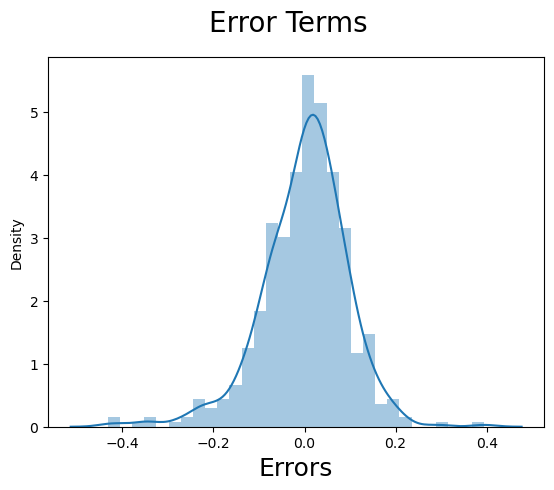

In [209]:
fig = plt.figure()
sns.distplot(res)
fig.suptitle('Error Terms', fontsize = 20) 
plt.xlabel('Errors', fontsize = 18) 
plt.show()

From the above plot, we can see that the Residuals are normally distributed. Hence our assumption for Linear Regression is valid.

Now, we can make predictions on the test data using our final model. First of all, we need to do scaling on the test data also. 

In [211]:
num_var = ['temp', 'hum', 'windspeed','cnt']
Day_test[num_var] = scaler.transform(Day_test[num_var])

In [212]:
Day_test.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,...,October,September,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,"Light Snow, Rain + Thunderstorm",Mist + Cloudy
184,0,1,0,0.831783,0.657364,0.084219,0.692706,0,0,0,...,0,0,0,0,0,0,0,1,0,1
535,1,0,1,0.901354,0.610133,0.153728,0.712034,0,1,0,...,0,0,0,0,0,1,0,0,0,0
299,0,0,0,0.511964,0.837699,0.334206,0.303382,0,0,1,...,1,0,0,1,0,0,0,0,0,1
221,0,0,1,0.881625,0.437098,0.339570,0.547400,0,0,0,...,0,0,0,0,0,0,0,0,0,0
152,0,0,0,0.817246,0.314298,0.537414,0.569029,0,1,0,...,0,0,0,1,0,0,0,0,0,0


In [213]:
Day_test.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,...,October,September,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,"Light Snow, Rain + Thunderstorm",Mist + Cloudy
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.481818,0.036364,0.640909,0.558718,0.638221,0.313293,0.522154,0.254545,0.263636,0.236364,...,0.086364,0.086364,0.118182,0.172727,0.154545,0.140909,0.122727,0.159091,0.027273,0.318182
std,0.500809,0.187620,0.480828,0.233187,0.148694,0.159584,0.219163,0.436599,0.441609,0.425817,...,0.281541,0.281541,0.323559,0.378873,0.362295,0.348721,0.328872,0.366595,0.163248,0.466833
min,0.000000,0.000000,0.000000,0.046591,0.261915,-0.042808,0.048205,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.355429,0.529197,0.198843,0.378595,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558172,0.625590,0.300126,0.524678,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.755981,0.743798,0.402718,0.677750,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,0.984424,1.002146,0.807474,0.963300,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [214]:
y_test = Day_test.pop('cnt')
X_test = Day_test

In [215]:
col_t = X_train_new5.columns
X_test=X_test[col_t]

In [216]:
X_test_lm7 = sm.add_constant(X_test)

In [218]:
y_pred = lm7.predict(X_test_lm7)

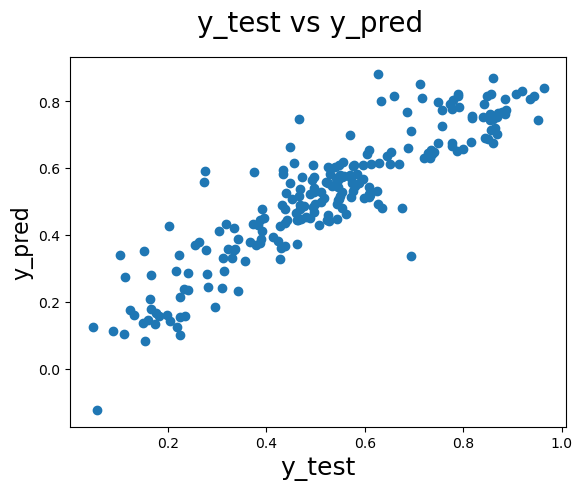

In [219]:
fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)             
plt.xlabel('y_test', fontsize = 18)                       
plt.ylabel('y_pred', fontsize = 16) 
plt.show()

In [225]:
r2 = r2_score(y_test, y_pred)
r2

0.8096078487662723

In [222]:
n = X_test.shape[0]

In [223]:
p = X_test.shape[1]

In [226]:
adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
adjusted_r2

0.8014481851419697

The rsquare value & adjusted rsquare value for the train data & test data seems to be similar. 

As per our final Model, the top 4 predictor variables that influences the bike booking are:

- Temperature : When temperature increases, the bike hire count also increases.  
- Weather Condition : When Light Snow / Rain with Thunderstorm happens, the count decreases (Have negative coefficients)
- Year : When the year has increased, the count seems to be increased. So, we can expect a gradual increase in the upcoming years. 
- Holidays : The bike hire count seems to be decreasing during holidays. 

So, the overall trend for bike sharing scheme is increasing year by year. However, planning the demand system based on the above factors can bring a high business. 